In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
import sklearn.linear_model as Logit
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,neighbors
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_curve,auc,precision_score,recall_score,cohen_kappa_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
path='F:/Munesh Backup/Munesh/Imarticus/Exam/Paper 1/Datasets/bank.csv'
bank=pd.read_csv(path,delimiter=';')
# checking shape of data
bank.shape

(41188, 21)

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# Exploratory Data Analysis

In [5]:
# checking for null values and data types
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# checking for zeroes
bank[bank==0].count()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [7]:
# splititng target variable from dataset
target=bank.pop('y')

no     36548
yes     4640
Name: y, dtype: int64


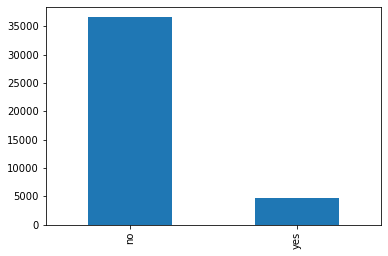

In [8]:
# Getting data count of y variable
print(target.value_counts())
target.value_counts().plot(kind='bar')

In [9]:
# converting categorical target to numerical
target[target=='yes']=1
target[target=='no']=0
target=target.astype(int)

In [10]:
# splitting data based on datatypes
data_num=bank.select_dtypes(exclude='object')
data_num.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Primary analysis of categorical Features

In [11]:
data_cat=bank.select_dtypes(include='object')
data_cat.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


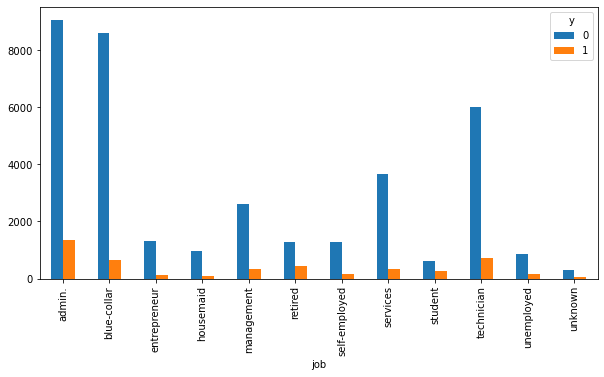

In [12]:

pd.crosstab(data_cat.job,target).plot(kind='bar',figsize=(10,5))

form above graph  we see that people with admin,blue_collar and technician jobs have subscribed very less

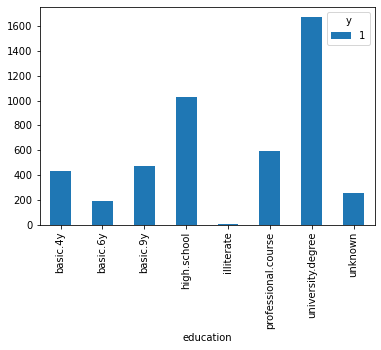

In [13]:
pd.crosstab(data_cat.education,target[target==1]).plot(kind='bar')

We see from above chart that peoplt with high degree have subscribed more

([<matplotlib.patches.Wedge at 0xed71a79340>,
 [Text(0.547115235087131, 0.9542876503107193, 'may'),
  Text(-0.9685119477195762, 0.5215214349616258, 'jul'),
  Text(-0.9521521031827198, -0.5508233586230012, 'aug'),
  Text(-0.185538703128984, -1.0842395444002284, 'jun'),
  Text(0.573968588808484, -0.9383816169667849, 'nov'),
  Text(0.960934275978496, -0.5353553186900115, 'apr'),
  Text(1.0650447970602024, -0.2750992189283579, 'oct'),
  Text(1.0868920558453878, -0.16930935869049457, 'sep'),
  Text(1.0973513325296063, -0.07628927182440225, 'mar'),
  Text(1.0998940144194014, -0.015269480815467293, 'dec')])

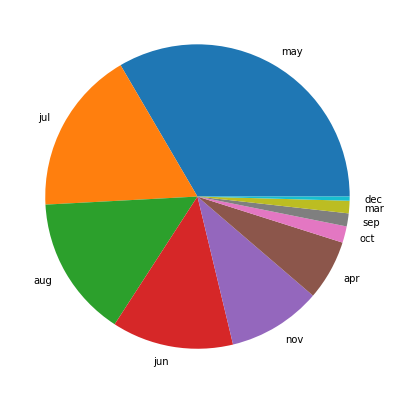

In [14]:
sizes=data_cat.month.value_counts()
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=sizes.index)

from above chart we find that people were contacted more in the month of may 

### EDA continued

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ED71AAFC40>,
      dtype=object)

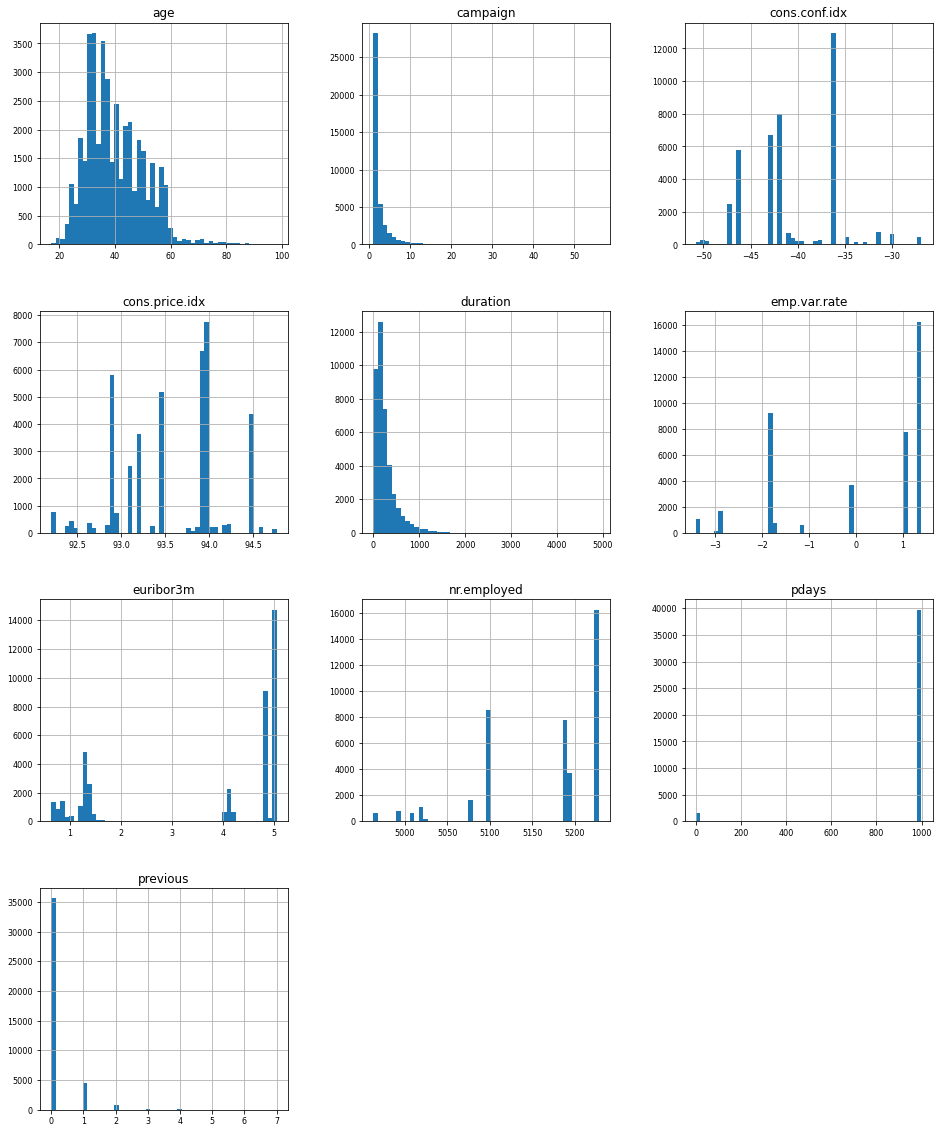

In [15]:
# checking for normality
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [16]:
# checking for correlation
cor=data_num.corr()
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


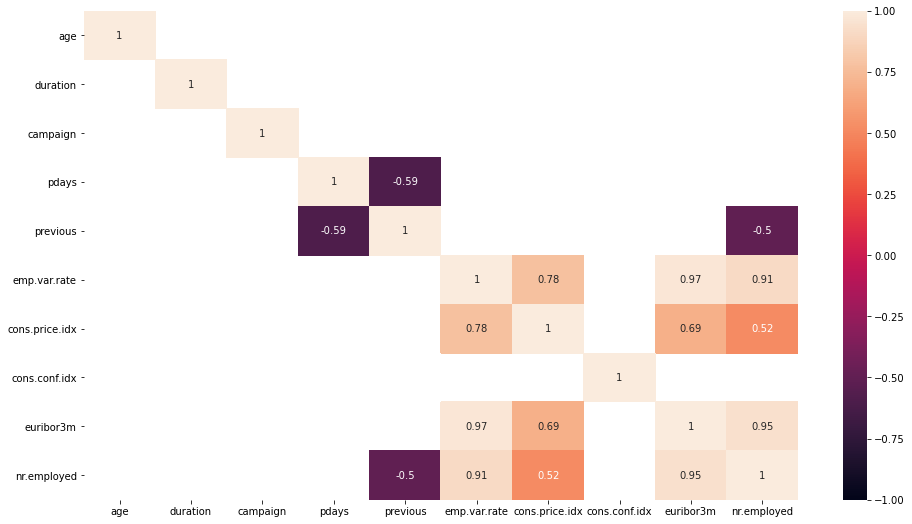

In [17]:
#plotting heatmap
plt.figure(figsize=(16,9))
sns.heatmap(cor[(cor>=0.5) | (cor<=-0.5)],vmin=-1,vmax=1,annot=True,square=False)

In [18]:
# getting dummy variables for categorical data(one hot encoding)
cat_dummy=pd.get_dummies(data_cat,drop_first=True)
cat_dummy.describe()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,...,0.334296,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335
std,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,...,0.471750,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# concatenating data 
raw_data=pd.concat([data_num,cat_dummy],axis=1)
raw_data.shape

(41188, 53)

In [20]:
#Splitting the data
trainx,testx,trainy,testy=train_test_split(raw_data,target,test_size=0.3)
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(28831, 53)
(28831,)
(12357, 53)
(12357,)


In [21]:
# creating a randomforest model with default parameters
m_rf=RandomForestClassifier().fit(trainx,trainy)
p_rf=m_rf.predict(testx)
print(confusion_matrix(testy,p_rf))
print(classification_report(testy,p_rf))
print(accuracy_score(testy,p_rf))

[[10681   287]
 [  776   613]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.68      0.44      0.54      1389

    accuracy                           0.91     12357
   macro avg       0.81      0.71      0.74     12357
weighted avg       0.90      0.91      0.91     12357

0.9139758841142672


In [22]:
# Standardizing the data using standard scalar
s_sc=StandardScaler()
data_num_sc=data_num.copy()
data_num_sc.iloc[:,:]=s_sc.fit_transform(data_num_sc.iloc[:,:])
data_num_sc.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,2.846557e-16,-3.170967e-16,1.845337e-14,9.515119e-14,2.196991e-13,-1.851020e-13,-5.933520e-14,-6.842191e-14,-6.864230e-14,-1.181213e-13
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.209365e+00,-9.961775e-01,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351e+00,-2.815697e+00
25%,-7.699804e-01,-6.027745e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994e+00,-9.402810e-01
50%,-1.942267e-01,-3.019369e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,7.124599e-01,3.316799e-01
75%,6.694038e-01,2.341712e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,7.724221e-01,8.451701e-01
max,5.563310e+00,1.797202e+01,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,8.208531e-01,8.451701e-01


In [23]:
# concatenating standardized data
raw_data_sc=pd.concat([data_num_sc,cat_dummy],axis=1)
# splititng the data
trainx_sc,testx_sc,trainy,testy=train_test_split(raw_data_sc,target,test_size=0.3)
trainx_sc.shape,testx_sc.shape,trainy.shape,testy.shape


((28831, 53), (12357, 53), (28831,), (12357,))

In [24]:
# building randomForest with standardized data
m_sc_rf=RandomForestClassifier().fit(trainx_sc,trainy)
p_sc_rf=m_sc_rf.predict(testx_sc)
print(confusion_matrix(testy,p_sc_rf))
print(classification_report(testy,p_sc_rf))
print(accuracy_score(testy,p_sc_rf))

[[10702   336]
 [  685   634]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11038
           1       0.65      0.48      0.55      1319

    accuracy                           0.92     12357
   macro avg       0.80      0.73      0.75     12357
weighted avg       0.91      0.92      0.91     12357

0.9173747673383508


In [25]:
# Standardizing the data using minmax scaler
mm_sc=MinMaxScaler()
data_num_tr=data_num.copy()
data_num_tr.iloc[:,:]=s_sc.fit_transform(data_num_tr.iloc[:,:])
data_num_tr.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,2.846557e-16,-3.170967e-16,1.845337e-14,9.515119e-14,2.196991e-13,-1.851020e-13,-5.933520e-14,-6.842191e-14,-6.864230e-14,-1.181213e-13
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.209365e+00,-9.961775e-01,-5.659220e-01,-5.149443e+00,-3.494943e-01,-2.216433e+00,-2.374889e+00,-2.224953e+00,-1.722351e+00,-2.815697e+00
25%,-7.699804e-01,-6.027745e-01,-5.659220e-01,1.954139e-01,-3.494943e-01,-1.197935e+00,-8.649547e-01,-4.747909e-01,-1.312994e+00,-9.402810e-01
50%,-1.942267e-01,-3.019369e-01,-2.049085e-01,1.954139e-01,-3.494943e-01,6.480923e-01,2.994571e-01,-2.803284e-01,7.124599e-01,3.316799e-01
75%,6.694038e-01,2.341712e-01,1.561049e-01,1.954139e-01,-3.494943e-01,8.390606e-01,7.227225e-01,8.864466e-01,7.724221e-01,8.451701e-01
max,5.563310e+00,1.797202e+01,1.928982e+01,1.954139e-01,1.379492e+01,8.390606e-01,2.058168e+00,2.939106e+00,8.208531e-01,8.451701e-01


In [26]:
# concatenating standardized data
raw_data_tr=pd.concat([data_num_tr,cat_dummy],axis=1)
# splititng the data
trainx_tr,testx_tr,trainy,testy=train_test_split(raw_data_tr,target,test_size=0.3)
trainx_tr.shape,testx_tr.shape,trainy.shape,testy.shape

((28831, 53), (12357, 53), (28831,), (12357,))

In [27]:
# building randomForest with standardized data
m_tr_rf=RandomForestClassifier().fit(trainx_tr,trainy)
p_tr_rf=m_tr_rf.predict(testx_tr)
print(confusion_matrix(testy,p_tr_rf))
print(classification_report(testy,p_tr_rf))
print(accuracy_score(testy,p_tr_rf))

[[10622   349]
 [  733   653]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10971
           1       0.65      0.47      0.55      1386

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357

0.9124382940843246


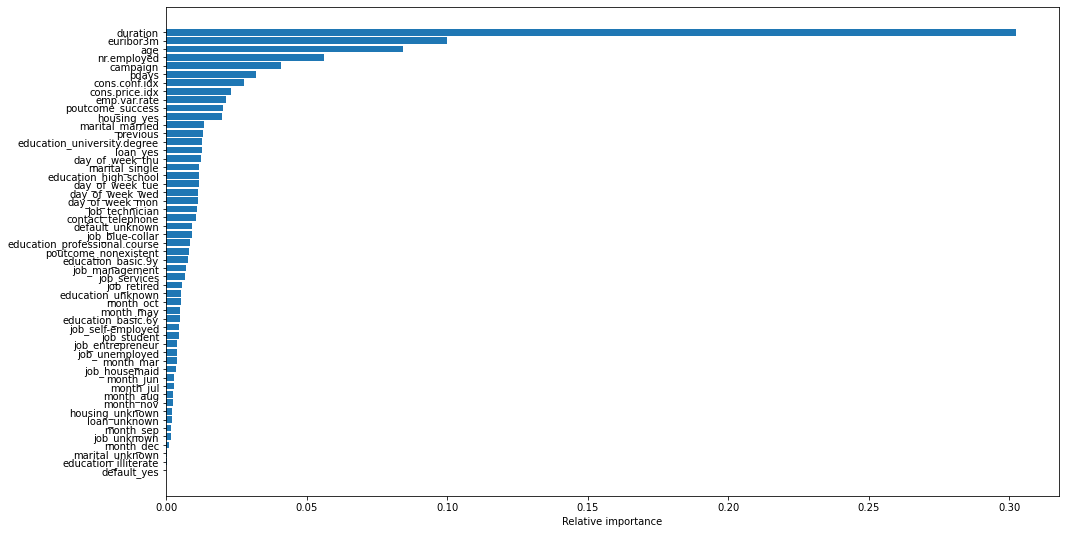

In [28]:
# plotting important features
imp_f=m_tr_rf.feature_importances_
cols=raw_data.columns
index=imp_f.argsort()
plt.figure(figsize=(16,9))
plt.barh(range(len(imp_f)),imp_f[index])
plt.yticks(range(len(imp_f)),[cols[i] for i in index])
plt.xlabel('Relative importance')
plt.show()

In [29]:
# running a model with top 10 important featues
raw_data_imp=raw_data_tr.iloc[:,index[-10:]]
raw_data_imp.head()

,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,pdays,campaign,nr.employed,age,euribor3m,duration
0,0,0.648092,0.722722,0.886447,0.195414,-0.565922,0.33168,1.533034,0.71246,0.010471
1,0,0.648092,0.722722,0.886447,0.195414,-0.565922,0.33168,1.628993,0.71246,-0.421501
2,0,0.648092,0.722722,0.886447,0.195414,-0.565922,0.33168,-0.290186,0.71246,-0.124520
3,0,0.648092,0.722722,0.886447,0.195414,-0.565922,0.33168,-0.002309,0.71246,-0.413787
4,0,0.648092,0.722722,0.886447,0.195414,-0.565922,0.33168,1.533034,0.71246,0.187888


In [30]:
# splititng the data
trainx_imp,testx_imp,trainy,testy=train_test_split(raw_data_imp,target,test_size=0.3)
# building randomForest with important features data
m_imp=RandomForestClassifier().fit(trainx_imp,trainy)
p_imp=m_imp.predict(testx_imp)
print(confusion_matrix(testy,p_imp))
print(classification_report(testy,p_imp))
print(accuracy_score(testy,p_imp))

[[10492   486]
 [  645   734]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10978
           1       0.60      0.53      0.56      1379

    accuracy                           0.91     12357
   macro avg       0.77      0.74      0.76     12357
weighted avg       0.90      0.91      0.91     12357

0.9084729303228939


# Building supervised models


In [31]:

#splitting the data
trainx,testx,trainy,testy=train_test_split(raw_data_tr,target,test_size=0.3)
trainx.shape,testx.shape,trainy.shape,testy.shape

((28831, 53), (12357, 53), (28831,), (12357,))

In [33]:
# building logistic model
model_lm=Logit.LogisticRegression().fit(trainx,trainy)
p_lm=model_lm.predict(testx)
print(confusion_matrix(testy,p_lm))
print(classification_report(testy,p_lm))
print(accuracy_score(testy,p_lm))
print(f1_score(testy,p_lm))

[[10597   320]
 [  794   646]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10917
           1       0.67      0.45      0.54      1440

    accuracy                           0.91     12357
   macro avg       0.80      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357

0.9098486687707372
0.5369908561928511


In [34]:
# building adaboost model
dt=DecisionTreeClassifier(max_depth=1)   #using 1 features i.e 1 stump for Adaboost
for i in [25,50,75,100]:
    model_ada=AdaBoostClassifier(dt,n_estimators=i).fit(trainx,trainy)
    p_ada=model_ada.predict(testx)
#    print(confusion_matrix(testy,p_ada))
#    print(classification_report(testy,p_ada))
    print(i,accuracy_score(testy,p_ada))

25 0.9049931213077608
50 0.907825523994497
75 0.9086347819049931
100 0.908877559278142


9

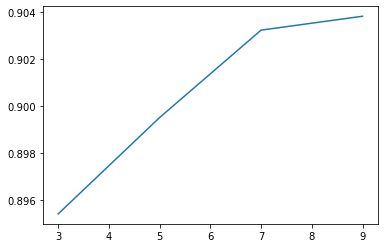

In [35]:
# cross validation to select optimum k for knn
NN=range(3,10,2)
cv_scores=[]
for k in NN:
    model_knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    acc=cross_val_score(model_knn,trainx,trainy,cv=2,scoring='accuracy')
    cv_scores.append(acc.mean())
cv_scores
plt.plot(NN,cv_scores)
optk=NN[cv_scores.index(max(cv_scores))]
optk

In [36]:
# cross validation to select optimum c for svm
#log_C=np.logspace(-1,2,4)
#cv_score=[]
#for c in log_C:
#    model_svm=svm.SVC(kernel='linear',C=c)
 #   accuracy=cross_val_score(model_svm,trainx,trainy,cv=2,scoring='accuracy')
  #  cv_score.append(np.mean(accuracy))
#cv_score
#plt.plot(np.log(log_C),cv_score)
#opt_C=log_C[cv_score.index(max(cv_score))]
#opt_C

In [37]:
#we select C=100  for future models

In [38]:
# Building a function that will run all models
def run_model(trainx,trainy):
    
    
    #Logistic Model
    model_lm=Logit.LogisticRegression().fit(trainx,trainy)
    
    #Adaboost Model
    dt=DecisionTreeClassifier(max_depth=1)   #using 1 features i.e 1 stump for Adaboost
    model_ada=AdaBoostClassifier(dt,n_estimators=50).fit(trainx,trainy)
        
    #knn Model
    model_knn=neighbors.KNeighborsClassifier(n_neighbors=9).fit(trainx,trainy)
    #svm Model 
    model_svm=svm.SVC(kernel='linear').fit(trainx,trainy)
    
    return [model_lm,model_ada,model_knn,model_svm]

In [39]:
# building funtion to plot ROC AUC curve and get metrics
def get_results(model,testx,testy):
    # unpacking the models
    model_lm,model_ada,model_knn,model_svm=model
    
    # predicting the values
    p_lm=model_lm.predict(testx)
    p_ada=model_ada.predict(testx)
    p_knn=model_knn.predict(testx)
    p_svm=model_svm.predict(testx)
    
    # creating lists to store result
    model=['Logistic','Adaboost','Knn','SVM']
    
    accuracy=np.round(np.array([accuracy_score(testy,p_lm),accuracy_score(testy,p_ada),
              accuracy_score(testy,p_knn),accuracy_score(testy,p_svm)]),2)
    
    f1score=np.round(np.array([f1_score(testy,p_lm),f1_score(testy,p_ada),
                               f1_score(testy,p_knn),f1_score(testy,p_svm)]),2)
    
    # unpacking fpr,tpr
    fpr_lr,tpr_lr,thres_lr=roc_curve(testy,p_lm)
    fpr_ada,tpr_ada,thres_ada=roc_curve(testy,p_ada)
    fpr_knn,tpr_knn,thres_knn=roc_curve(testy,p_knn)
    fpr_svm,tpr_svm,thres_svm=roc_curve(testy,p_svm)
    
    #getting auc
    auc_lr=np.round(auc(fpr_lr,tpr_lr),2)
    auc_ada=np.round(auc(fpr_ada,tpr_ada),2)
    auc_knn=np.round(auc(fpr_knn,tpr_knn),2)
    auc_svm=np.round(auc(fpr_svm,tpr_svm),2)
    roc_auc=[auc_lr,auc_ada,auc_knn,auc_svm]

    # getting the tpr for roc_curve which is sensitivity
    sensitivity=np.round(np.array([tpr_lr[1],tpr_ada[1],tpr_knn[1],tpr_svm[1]]),2)
    # getting the fpr and subtracting from 1 to get specificity
    specificity=np.round(np.array([1-fpr_lr[1],1-fpr_ada[1],1-fpr_knn[1],1-fpr_svm[1]]),2)
    
    
    results=pd.DataFrame({'model':model,'accuracy':accuracy,'f1_score':f1score,
                          'sensitivity':sensitivity,'specificity':specificity,'ROC':roc_auc})
    
   # results=pd.DataFrame({'model':model,'accuracy':accuracy,
    #                      'sensitivity':sensitivity,'specificity':specificity,'ROC':roc_auc})
    # plotting ROC AUC
    plt.figure(figsize=(15,7))
    plt.plot(fpr_lr,tpr_lr,label='Logistic AUC: %0.2f'%auc_lr)
    plt.plot(fpr_ada,tpr_ada,label='AdaBoost AUC: %0.2f'%auc_ada)
    plt.plot(fpr_knn,tpr_knn,label='Knn AUC: %0.2f'%auc_knn)
    plt.plot(fpr_svm,tpr_svm,label='Svm AUC: %0.2f'%auc_svm)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC curve')
    plt.legend()
    plt.show()
    
    
    return results

In [40]:
trainy.head()

16637    0
10188    0
32273    0
37342    0
32111    0
Name: y, dtype: int32

In [41]:
# creating model
model=run_model(trainx,trainy)

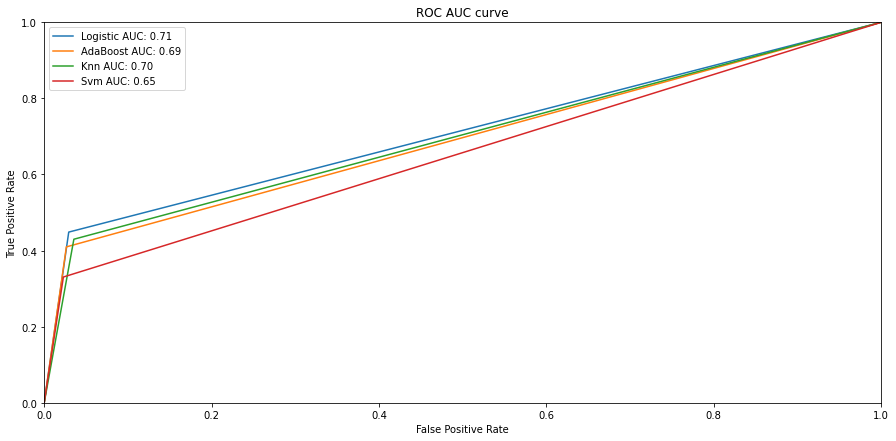

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Logistic,0.91,0.54,0.45,0.97,0.71
1,Adaboost,0.91,0.51,0.41,0.97,0.69
2,Knn,0.90,0.51,0.43,0.96,0.70
3,SVM,0.90,0.44,0.33,0.98,0.65


In [42]:
# plotting ROC AUC curve and getting results
result_1=get_results(model,testx,testy)
result_1

In [44]:
trainx.pop('emp.var.rate')
testx.pop('emp.var.rate')

36546   -1.898153
11423    0.839061
14220    0.839061
7546     0.648092
25263   -0.115781
           ...   
40840   -0.752343
14907    0.839061
33856   -1.197935
12329    0.839061
1507     0.648092
Name: emp.var.rate, Length: 12357, dtype: float64

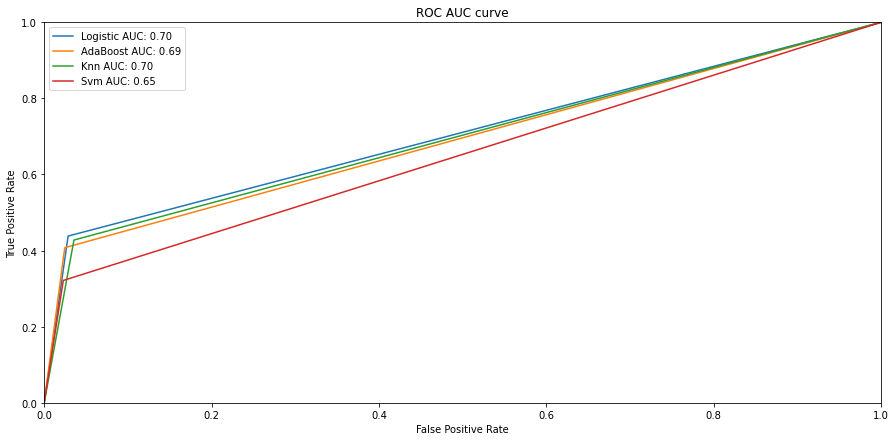

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Logistic,0.91,0.53,0.44,0.97,0.70
1,Adaboost,0.91,0.51,0.41,0.98,0.69
2,Knn,0.90,0.50,0.43,0.96,0.70
3,SVM,0.90,0.43,0.32,0.98,0.65


In [45]:
# Building model after removing variable
model=run_model(trainx,trainy)
# Plotting graphs & getting results
result_2=get_results(model,testx,testy)
result_2

In [46]:
trainx.pop('euribor3m')
testx.pop('euribor3m')

36546   -1.361425
11423    0.771269
14220    0.772999
7546     0.716496
25263    0.306562
           ...   
40840   -1.581094
14907    0.770116
33856   -1.349317
12329    0.771269
1507     0.711307
Name: euribor3m, Length: 12357, dtype: float64

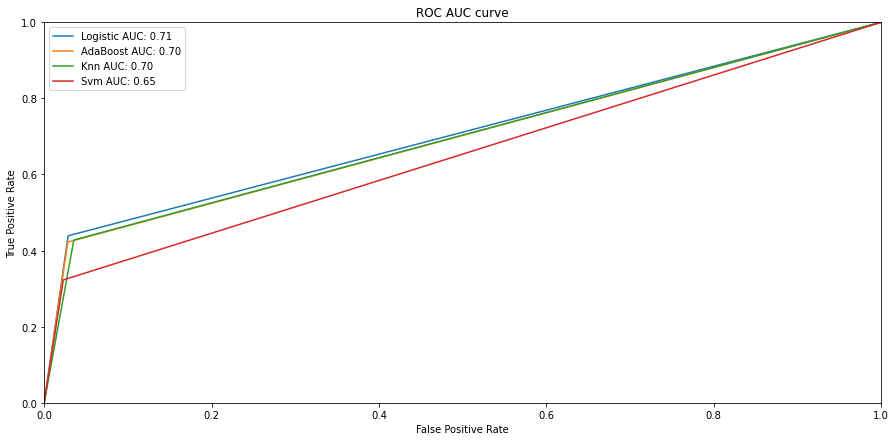

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Logistic,0.91,0.53,0.44,0.97,0.71
1,Adaboost,0.91,0.52,0.42,0.97,0.70
2,Knn,0.90,0.50,0.43,0.96,0.70
3,SVM,0.90,0.43,0.32,0.98,0.65


In [47]:
# Building model after removing variable
model=run_model(trainx,trainy)
# Plotting graphs & getting results
result_3=get_results(model,testx,testy)
result_3

In [48]:
# removing duration as mentioned in Problem Statement
trainx.pop('duration')
testx.pop('duration')

36546   -0.394502
11423   -0.517923
14220    1.649651
7546    -0.672199
25263   -0.209371
           ...   
40840    2.822146
14907   -0.070523
33856   -0.398359
12329   -0.309651
1507    -0.548778
Name: duration, Length: 12357, dtype: float64

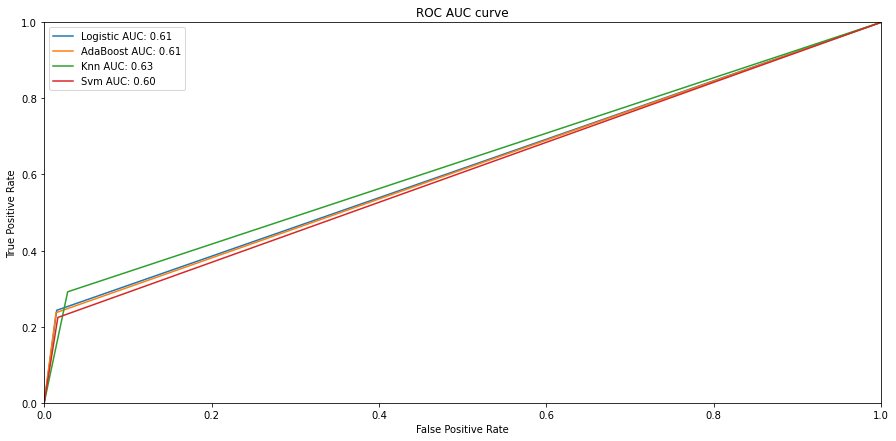

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Logistic,0.90,0.36,0.24,0.99,0.61
1,Adaboost,0.90,0.35,0.24,0.99,0.61
2,Knn,0.89,0.39,0.29,0.97,0.63
3,SVM,0.90,0.33,0.22,0.98,0.60


In [50]:
# Building model after removing variable
model=run_model(trainx,trainy)
# Plotting graphs & getting results
result_4=get_results(model,testx,testy)
result_4

In [51]:
# Comparing results
print('Model with all features\n',result_1)
print('\nModel with emp.var.rate feature removed\n',result_2)
print('\nModel with euribor3m feature removed\n',result_3)
print('\nModel with duration feature removed\n',result_4)

Model with all features
       model  accuracy  f1_score  sensitivity  specificity   ROC
0  Logistic      0.91      0.54         0.45         0.97  0.71
1  Adaboost      0.91      0.51         0.41         0.97  0.69
2       Knn      0.90      0.51         0.43         0.96  0.70
3       SVM      0.90      0.44         0.33         0.98  0.65

Model with emp.var.rate feature removed
       model  accuracy  f1_score  sensitivity  specificity   ROC
0  Logistic      0.91      0.53         0.44         0.97  0.70
1  Adaboost      0.91      0.51         0.41         0.98  0.69
2       Knn      0.90      0.50         0.43         0.96  0.70
3       SVM      0.90      0.43         0.32         0.98  0.65

Model with euribor3m feature removed
       model  accuracy  f1_score  sensitivity  specificity   ROC
0  Logistic      0.91      0.53         0.44         0.97  0.71
1  Adaboost      0.91      0.52         0.42         0.97  0.70
2       Knn      0.90      0.50         0.43         0.96  0.7